In [222]:
import csv
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchtext
import numpy as np
import matplotlib.pyplot as plt

In [223]:
import torch
import torchtext

# The first time you run this will download a ~823MB file
glove = torchtext.vocab.GloVe(name="6B", # trained on Wikipedia 2014 corpus
                              dim=50)   # embedding size = 50

In [224]:
glove['car']

tensor([ 0.4769, -0.0846,  1.4641,  0.0470,  0.1469,  0.5082, -1.2228, -0.2261,
         0.1931, -0.2976,  0.2060, -0.7128, -1.6288,  0.1710,  0.7480, -0.0619,
        -0.6577,  1.3786, -0.6804, -1.7551,  0.5832,  0.2516, -1.2114,  0.8134,
         0.0948, -1.6819, -0.6450,  0.6322,  1.1211,  0.1611,  2.5379,  0.2485,
        -0.2682,  0.3282,  1.2916,  0.2355,  0.6147, -0.1344, -0.1324,  0.2740,
        -0.1182,  0.1354,  0.0743, -0.6195,  0.4547, -0.3032, -0.2188, -0.5605,
         1.1177, -0.3659])

In [225]:
#words that are more similar have a smaller distance between them
print(torch.norm(glove['good'] - glove['well']))

tensor(2.7703)


In [226]:
print(torch.norm(glove['good'] - glove['evil']))

tensor(5.4205)


In [227]:
x = torch.tensor([1., 1.]).unsqueeze(0)
y = torch.tensor([2., 2.]).unsqueeze(0)
torch.cosine_similarity(x, y)

tensor([1.])

In [228]:
x = torch.tensor([1., 1.]).unsqueeze(0)
y = torch.tensor([-2., -2.]).unsqueeze(0)
torch.cosine_similarity(x, y)

tensor([-1.])

In [229]:
#words that are more similar have a larger cosine_similarity
x = glove['cat']
y = glove['dog']
print(torch.cosine_similarity(x.unsqueeze(0), y.unsqueeze(0)))

tensor([0.9218])


In [230]:
print(torch.cosine_similarity(glove['good'].unsqueeze(0), 
                        glove['bad'].unsqueeze(0)))

tensor([0.7965])


In [231]:
print(torch.cosine_similarity(glove['good'].unsqueeze(0), 
                        glove['well'].unsqueeze(0)))

tensor([0.8511])


In [232]:
print(torch.cosine_similarity(glove['evil'].unsqueeze(0), 
                        glove['good'].unsqueeze(0)))

tensor([0.4594])


In [233]:
print(torch.cosine_similarity(glove['window'].unsqueeze(0), 
                        glove['keyboard'].unsqueeze(0)))

tensor([0.4933])


In [234]:
print(torch.cosine_similarity(glove['window'].unsqueeze(0), 
                        glove['frame'].unsqueeze(0)))

tensor([0.7465])


In [235]:
word = 'cat'
other = ['pet', 'dog', 'bike', 'kitten', 'puppy', 'kite', 'computer', 'neuron']
for w in other:
    dist = torch.norm(glove[word] - glove[w]) # euclidean distance
    print(w, float(dist))

pet 3.039675712585449
dog 1.8846031427383423
bike 5.048375129699707
kitten 3.5068609714508057
puppy 3.0644655227661133
kite 4.210376262664795
computer 6.030652046203613
neuron 6.228669166564941


In [236]:
def print_closest_words(vec, n=5):
    dists = torch.norm(glove.vectors - vec, dim=1)     # compute distances to all words
    lst = sorted(enumerate(dists.numpy()), key=lambda x: x[1]) # sort by distance
    for idx, difference in lst[1:n+1]:                         # take the top n
        print(glove.itos[idx], difference)

print_closest_words(glove["cat"], n=10)

dog 1.8846031
rabbit 2.4572797
monkey 2.8102052
cats 2.8972251
rat 2.9455352
beast 2.9878407
monster 3.0022194
pet 3.0396757
snake 3.0617998
puppy 3.0644655


In [237]:
print_closest_words(glove['michael'])

peter 2.922138
moore 2.9317658
david 2.9446106
steven 2.9881783
murphy 3.018417


In [238]:
print_closest_words(glove['bravo'])

marlon 3.796622
dwayne 3.8805976
coco 3.908012
hooper 3.9350464
lara 4.029812


In [239]:
print_closest_words((glove['happy'] + glove['sad']) / 2)

happy 1.9199749
feels 2.360464
sorry 2.4984782
hardly 2.52593
imagine 2.5652788


In [240]:
print_closest_words((glove['lake'] + glove['building']) / 2)

surrounding 3.0698411
nearby 3.1112065
bridge 3.1585503
along 3.1610188
shore 3.1618817


In [241]:
print_closest_words(glove['king'] - glove['man'] + glove['woman'])

queen 2.8391206
prince 3.6610038
elizabeth 3.7152522
daughter 3.8317878
widow 3.8493774


In [242]:
print_closest_words((glove['good'] + glove['bad']) / 2)

bad 1.6594452
really 2.0014532
little 2.0081773
too 2.169402
sure 2.171685


In [243]:
print_closest_words(glove['doctor'] - glove['man'] + glove['woman'])

nurse 3.1355345
pregnant 3.7805371
child 3.78347
woman 3.8643107
mother 3.922231


In [244]:
print_closest_words(glove['doctor'] - glove['woman'] + glove['man'])

man 3.9335632
colleague 3.975502
himself 3.9847784
brother 3.9997008
another 4.029071


In [245]:
#setup Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [246]:
import csv

# file location (make sure to use your file location)
file_dir = '/content/drive/MyDrive/Aps360 Project/Datasets/'

# load csv file
def get_data():
    return csv.reader(open(file_dir + "train_sentiment.csv","rt", encoding="utf-8"))

# print only the first review
for i, line in enumerate(get_data()):
    if line[0] != '1':
        print(line[0], line[-1])
        break


2 Been going to Dr. Goldberg for over 10 years. I think I was one of his 1st patients when he started at MHMG. He's been great over the years and is really all about the big picture. It is because of him, not my now former gyn Dr. Markoff, that I found out I have fibroids. He explores all options with you and is very patient and understanding. He doesn't judge and asks all the right questions. Very thorough and wants to be kept in the loop on every aspect of your medical health and your life.


In [247]:
import torchtext
glove = torchtext.vocab.GloVe(name="6B", dim=50)

def split_review(review):
    # separate punctuations
    review = review.replace(".", " . ") \
                 .replace(",", " , ") \
                 .replace(";", " ; ") \
                 .replace("?", " ? ") \
                 .replace("!", " ! ") \
                 .replace("-"," - ") \
                 .replace("/"," / ") \
                 .replace(":"," :") \
                 .replace("%"," % ") \
                 .replace("I'm", "I am") \
                 .replace("n't"," not") \
                 .replace("'ve"," have") \
                 .replace("'ll"," will") \
                 .replace("'re", " are") \
                 .replace("'d"," would") \
                 .replace("it's","it is") \
                 .replace("It's","It is") \
                 .replace("there's","there is") \
                 .replace("what's","what is") \
                 .replace("\\n"," ") \
                 .replace("$", "$ ") \
                 .replace("\\\"", " \" ") \
                 .replace("(","( ") \
                 .replace(")"," )") \
                 .replace("'"," ' ")

    return review.lower().split()

split_review("hello; don't you know?")

['hello', ';', 'do', 'not', 'you', 'know', '?']

In [248]:
# verify that each review has a reasonable number of words
# that have GloVe embeddings
for i, line in enumerate(get_data()):
    if i > 30:
        break
    print(sum(int(w in glove.stoi) for w in split_review(line[-1])), "out of", 
          len(split_review(line[-1])),"review: ", line[-1])
    
for i, line in enumerate(get_data()):
    if i > 30:
        break
    for j, w in enumerate(split_review(line[-1])):
      if w not in glove.stoi:
        print(w, "at position: ", j)

137 out of 137 review:  Unfortunately, the frustration of being Dr. Goldberg's patient is a repeat of the experience I've had with so many other doctors in NYC -- good doctor, terrible staff.  It seems that his staff simply never answers the phone.  It usually takes 2 hours of repeated calling to get an answer.  Who has time for that or wants to deal with it?  I have run into this problem with many other doctors and I just don't get it.  You have office workers, you have patients with medical needs, why isn't anyone answering the phone?  It's incomprehensible and not work the aggravation.  It's with regret that I feel that I have to give Dr. Goldberg 2 stars.
110 out of 111 review:  Been going to Dr. Goldberg for over 10 years. I think I was one of his 1st patients when he started at MHMG. He's been great over the years and is really all about the big picture. It is because of him, not my now former gyn Dr. Markoff, that I found out I have fibroids. He explores all options with you and

In [249]:
def get_review_words(glove_vector):
    train, valid, test = [], [], []
    for i, line in enumerate(get_data()):
        if i % 29 == 0:
            review = line[-1]
            idxs = [glove_vector.stoi[w]        # lookup the index of word
                    for w in split_review(review)
                    if w in glove_vector.stoi] # keep words that has an embedding
            if not idxs: # ignore reviews without any word with an embedding
                continue
            idxs = torch.tensor(idxs) # convert list to pytorch tensor
            label = torch.tensor(int(line[0] == '2')).long()
            if i % 5 < 3:
                train.append((idxs, label))
            elif i % 5 == 4:
                valid.append((idxs, label))
            else:
                test.append((idxs, label))
    return train, valid, test

train, valid, test = get_review_words(glove)

In [250]:
review, label = train[4]
print(review)
print(label)

tensor([ 14630,    270,     64,    204,      2,    192,   1327,     15,    781,
             6,     13,      7, 115890,   1248,     25,    614,   2769,    204,
         71472,     13,    277,    766,      1,      5,    120,    106,   4643,
            13,    185,      1,     41,   4601,     41,     15,     36,    222,
             4,     30,    667,      4,   2065,    103,     60,      2,     41,
           175,     58,    905,  18634,    270,    204,    421,      5,     15,
         29567,   3553,     12,   1318,   2529,     60,      2,     41,    843,
            60,   1354,      4,   4010,      1,      0,   1778,      1,      5,
            18,     15,    667,      4,   6854,    192,     76,     11,   1214,
          1850,      2,    192,   1327,   1844,    388,      4,      0,   1797,
           286,    241,     23,     13,   1530,      3,     26,   4294,  20779,
            45,     24,    100,      0,    128,    175,    285,  61314,     61,
            18,    119,     36,    273, 

In [251]:
for i in range(10):
    review, label = train[i]
    print(review.shape)
    print(label)
    print()

torch.Size([137])
tensor(0)

torch.Size([56])
tensor(0)

torch.Size([106])
tensor(0)

torch.Size([635])
tensor(0)

torch.Size([161])
tensor(1)

torch.Size([197])
tensor(1)

torch.Size([891])
tensor(0)

torch.Size([58])
tensor(0)

torch.Size([104])
tensor(1)

torch.Size([258])
tensor(0)



In [252]:
glove_emb = nn.Embedding.from_pretrained(glove.vectors)
review_emb = glove_emb(review)
print(review.shape) #review has 258 words
print(review_emb.shape) #each word is represented by a glove vector with 50 dimensions

torch.Size([258])
torch.Size([258, 50])


In [253]:
rnn_layer = nn.RNN(input_size=50,    # dimension of the input repr
                   hidden_size=50,   # dimension of the hidden units
                   batch_first=True) # input format is [batch_size, seq_len, repr_dim]

In [254]:
review_input = review_emb.unsqueeze(0) # add the batch_size dimension
h0 = torch.zeros(1, 1, 50)           # initial hidden state
out, last_hidden = rnn_layer(review_input, h0)

print(out.shape)
print(last_hidden.shape)

torch.Size([1, 258, 50])
torch.Size([1, 1, 50])


In [255]:
out[:,-1,:].shape

torch.Size([1, 50])

In [256]:
class ReviewRNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(ReviewRNN, self).__init__()
        self.emb = nn.Embedding.from_pretrained(glove.vectors)
        self.hidden_size = hidden_size
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)
        self.name = "RNN_word"
    def forward(self, x):
        # Look up the embedding
        x = self.emb(x)
        # Set an initial hidden state
        h0 = torch.zeros(1, x.size(0), self.hidden_size)
        # Forward propagate the RNN
        out, _ = self.rnn(x, h0)
        # Pass the output of the last time step to the classifier
        out = self.fc(out[:, -1, :])
        return out

model = ReviewRNN(50, 50, 2)

In [257]:
from torch.nn.utils.rnn import pad_sequence

review_padded = pad_sequence([review for review, label in train[:10]],
                            batch_first=True)
print(review_padded.shape)
print(review_padded[0:2])

torch.Size([10, 891])
tensor([[4716,    1,    0,  ...,    0,    0,    0],
        [  83,   63,   15,  ...,    0,    0,    0]])


In [258]:
out = model(review_padded)
print(type(out))
print(out.shape)

<class 'torch.Tensor'>
torch.Size([10, 2])


In [259]:
import random

class ReviewBatcher:
    def __init__(self, reviews, batch_size=32, drop_last=False):
        # store reviews by length
        self.reviews_by_length = {}
        for review, label in reviews:
            # compute the length of the review
            wlen = review.shape[0]
            # put the review in the correct key inside self.review_by_length
            if wlen not in self.reviews_by_length:
                self.reviews_by_length[wlen] = []
            self.reviews_by_length[wlen].append((review, label),)
         
        #  create a DataLoader for each set of reviews of the same length
        self.loaders = {wlen : torch.utils.data.DataLoader(
                                    reviews,
                                    batch_size=batch_size,
                                    shuffle=True,
                                    drop_last=drop_last) # omit last batch if smaller than batch_size
            for wlen, reviews in self.reviews_by_length.items()}
        
    def __iter__(self): # called by Python to create an iterator
        # make an iterator for every review length
        iters = [iter(loader) for loader in self.loaders.values()]
        while iters:
            # pick an iterator (a length)
            im = random.choice(iters)
            try:
                yield next(im)
            except StopIteration:
                # no more elements in the iterator, remove it
                iters.remove(im)

In [260]:
for i, (reviews, labels) in enumerate(ReviewBatcher(train, drop_last=True)):
    if i > 20: break
    print(reviews.shape, labels.shape)

torch.Size([32, 76]) torch.Size([32])
torch.Size([32, 42]) torch.Size([32])
torch.Size([32, 56]) torch.Size([32])
torch.Size([32, 29]) torch.Size([32])
torch.Size([32, 67]) torch.Size([32])
torch.Size([32, 156]) torch.Size([32])
torch.Size([32, 58]) torch.Size([32])
torch.Size([32, 55]) torch.Size([32])
torch.Size([32, 115]) torch.Size([32])
torch.Size([32, 24]) torch.Size([32])
torch.Size([32, 104]) torch.Size([32])
torch.Size([32, 34]) torch.Size([32])
torch.Size([32, 33]) torch.Size([32])
torch.Size([32, 68]) torch.Size([32])
torch.Size([32, 154]) torch.Size([32])
torch.Size([32, 98]) torch.Size([32])
torch.Size([32, 63]) torch.Size([32])
torch.Size([32, 216]) torch.Size([32])
torch.Size([32, 120]) torch.Size([32])
torch.Size([32, 119]) torch.Size([32])
torch.Size([32, 62]) torch.Size([32])


In [261]:
def get_accuracy(model, data_loader):
    correct, total = 0, 0
    for reviews, labels in data_loader:
        output = model(reviews)
        pred = output.max(1, keepdim=True)[1]
        correct += pred.eq(labels.view_as(pred)).sum().item()
        total += labels.shape[0]
    return correct / total

test_loader = ReviewBatcher(test, batch_size=64, drop_last=False)
get_accuracy(model, test_loader)

0.4971517348524081

In [262]:
def get_model_name(name, hidden_size, batch_size, learning_rate, epoch):
    """ Generate a name for the model consisting of all the hyperparameter values

    Args:
        config: Configuration object containing the hyperparameters
    Returns:
        path: A string with the hyperparameter name and value concatenated
    """
    path = "model_{0}_{1}_bs{2}_lr{3}_epoch{4}".format(name,hidden_size,
                                                   batch_size,
                                                   learning_rate,
                                                   epoch)
    return path

In [263]:
def plot_training_curve(path):
    """ Plots the training curve for a model run, given the csv files
    containing the train/validation error/loss.

    Args:
        path: The base path of the csv files produced during training
    """
    import matplotlib.pyplot as plt
    train_accuracy = np.loadtxt("{}_train_accuracy.csv".format(path))
    val_accuracy = np.loadtxt("{}_val_accuracy.csv".format(path))
    train_loss = np.loadtxt("{}_train_loss.csv".format(path))

    plt.title("Train vs Validation Accuracy")
    n = len(train_accuracy) # number of epochs
    plt.plot(range(1,n+1), train_accuracy, label="Train")
    plt.plot(range(1,n+1), val_accuracy, label="Validation")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend(loc='best')
    plt.show()
    plt.title("Train Loss")
    plt.plot(range(1,n+1), train_loss, label="Train")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(loc='best')
    plt.show()

In [264]:
basePath = "/content/drive/MyDrive/Aps360 Project/Datasets/SentimentAnalysis"
def train_rnn_network(model, train, valid, batch_size, num_epochs=5, learning_rate=1e-5):
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    losses, train_acc, valid_acc = [], [], []
    epochs = []
    for epoch in range(num_epochs):
        for reviews, labels in train:
            optimizer.zero_grad()
            pred = model(reviews)
            loss = criterion(pred, labels)
            loss.backward()
            optimizer.step()
        losses.append(float(loss))

        epochs.append(epoch)
        train_acc.append(get_accuracy(model, train))
        valid_acc.append(get_accuracy(model, valid))
        print("Epoch %d; Loss %f; Train Acc %f; Val Acc %f" % (
              epoch+1, loss, train_acc[-1], valid_acc[-1]))
        
        model_name = get_model_name(model.name,model.hidden_size,batch_size,
                                    learning_rate,epoch)
        torch.save(model.state_dict(), "{}/{}".format(basePath,model_name))
        
    model_name = get_model_name(model.name,model.hidden_size,batch_size,
                                    learning_rate,epoch)
    np.savetxt("{}/{}_train_loss.csv".format(basePath, model_name), losses)
    np.savetxt("{}/{}_train_accuracy.csv".format(basePath, model_name), train_acc)
    np.savetxt("{}/{}_val_accuracy.csv".format(basePath, model_name), valid_acc)

In [265]:
model = ReviewRNN(50, 50, 2)
train_loader = ReviewBatcher(train, batch_size=64, drop_last=True)
valid_loader = ReviewBatcher(valid, batch_size=64, drop_last=False)
train_rnn_network(model, train_loader, valid_loader,batch_size=64, num_epochs=20, learning_rate=2e-4)
get_accuracy(model, test_loader)

Epoch 1; Loss 0.690530; Train Acc 0.541016; Val Acc 0.513982
Epoch 2; Loss 0.674897; Train Acc 0.552734; Val Acc 0.517090
Epoch 3; Loss 0.681786; Train Acc 0.562500; Val Acc 0.522268
Epoch 4; Loss 0.657061; Train Acc 0.582031; Val Acc 0.543501
Epoch 5; Loss 0.663332; Train Acc 0.594727; Val Acc 0.553858
Epoch 6; Loss 0.654053; Train Acc 0.597656; Val Acc 0.552822
Epoch 7; Loss 0.695084; Train Acc 0.605469; Val Acc 0.571207
Epoch 8; Loss 0.681278; Train Acc 0.622070; Val Acc 0.567323
Epoch 9; Loss 0.650118; Train Acc 0.611328; Val Acc 0.577680
Epoch 10; Loss 0.611962; Train Acc 0.596680; Val Acc 0.582600
Epoch 11; Loss 0.655978; Train Acc 0.621094; Val Acc 0.580528
Epoch 12; Loss 0.653259; Train Acc 0.607422; Val Acc 0.584671
Epoch 13; Loss 0.664865; Train Acc 0.642578; Val Acc 0.574832
Epoch 14; Loss 0.603407; Train Acc 0.605469; Val Acc 0.582859
Epoch 15; Loss 0.596437; Train Acc 0.618164; Val Acc 0.582600
Epoch 16; Loss 0.657612; Train Acc 0.655273; Val Acc 0.581046
Epoch 17; Loss 0.

0.5890730191610565

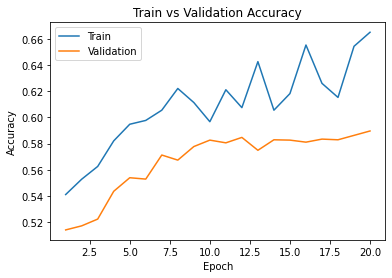

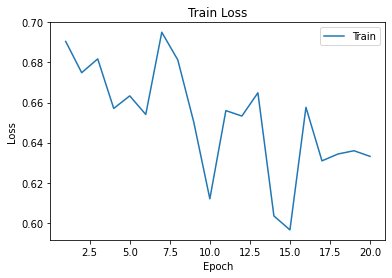

In [266]:
basePath = "/content/drive/MyDrive/Aps360 Project/Datasets/SentimentAnalysis"
epochs=20
modelPath = get_model_name(model.name, hidden_size=50, batch_size=64, learning_rate=2e-4, epoch=epochs-1)
plot_training_curve("{}/{}".format(basePath,modelPath))

In [267]:
model = ReviewRNN(50, 100, 2)
train_rnn_network(model, train_loader, valid_loader, batch_size=64, num_epochs=20, learning_rate=2e-4)
get_accuracy(model, test_loader)

Epoch 1; Loss 0.702079; Train Acc 0.563477; Val Acc 0.508027
Epoch 2; Loss 0.681657; Train Acc 0.561523; Val Acc 0.509322
Epoch 3; Loss 0.639792; Train Acc 0.591797; Val Acc 0.568617
Epoch 4; Loss 0.709805; Train Acc 0.612305; Val Acc 0.580269
Epoch 5; Loss 0.641650; Train Acc 0.621094; Val Acc 0.585448
Epoch 6; Loss 0.637557; Train Acc 0.631836; Val Acc 0.593734
Epoch 7; Loss 0.649541; Train Acc 0.621094; Val Acc 0.592439
Epoch 8; Loss 0.618242; Train Acc 0.640625; Val Acc 0.595028
Epoch 9; Loss 0.649996; Train Acc 0.650391; Val Acc 0.610306
Epoch 10; Loss 0.559919; Train Acc 0.665039; Val Acc 0.634386
Epoch 11; Loss 0.443991; Train Acc 0.741211; Val Acc 0.725013
Epoch 12; Loss 0.875002; Train Acc 0.540039; Val Acc 0.497152
Epoch 13; Loss 0.642475; Train Acc 0.573242; Val Acc 0.505179
Epoch 14; Loss 0.661341; Train Acc 0.597656; Val Acc 0.583894
Epoch 15; Loss 0.634420; Train Acc 0.637695; Val Acc 0.574055
Epoch 16; Loss 0.659550; Train Acc 0.640625; Val Acc 0.545054
Epoch 17; Loss 0.

0.5805282237182807

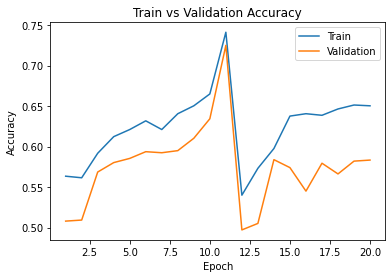

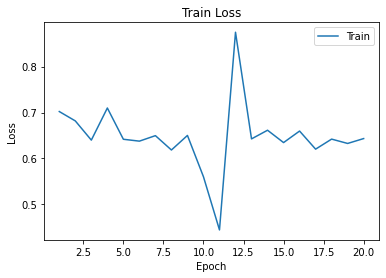

In [268]:
basePath = "/content/drive/MyDrive/Aps360 Project/Datasets/SentimentAnalysis"
epochs=20
modelPath = get_model_name("RNN_word", hidden_size=100, batch_size=64, learning_rate=2e-4, epoch=epochs-1)
plot_training_curve("{}/{}".format(basePath,modelPath))

In [269]:
def get_new_review(glove_vector, sample_review):
    review = sample_review
    idxs = [glove_vector.stoi[w]        # lookup the index of word
            for w in split_review(review)
            if w in glove_vector.stoi] # keep words that has an embedding
    idxs = torch.tensor(idxs) # convert list to pytorch tensor
    return idxs

In [270]:
new_review = get_new_review(glove, "Terrible food. Don't come here.")
print(new_review.shape)

out = torch.sigmoid(model(new_review.unsqueeze(0)))
pred = out.max(1, keepdim=True)[1]
print(pred)

torch.Size([8])
tensor([[0]])


In [271]:
new_review = get_new_review(glove, "Great food. Will come again!")
print(new_review.shape)

out = torch.sigmoid(model(new_review.unsqueeze(0)))
pred = out.max(1, keepdim=True)[1]
print(pred)

torch.Size([7])
tensor([[1]])


In [272]:
class ReviewLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(ReviewLSTM, self).__init__()
        self.emb = nn.Embedding.from_pretrained(glove.vectors)
        self.hidden_size = hidden_size
        self.rnn = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)
        self.name = "LSTM_word"
    
    def forward(self, x):
        # Look up the embedding
        x = self.emb(x)
        # Set an initial hidden state and cell state
        h0 = torch.zeros(1, x.size(0), self.hidden_size)
        c0 = torch.zeros(1, x.size(0), self.hidden_size)
        # Forward propagate the LSTM
        out, _ = self.rnn(x, (h0, c0))
        # Pass the output of the last time step to the classifier
        out = self.fc(out[:, -1, :])
        return out

model = ReviewLSTM(50, 50, 2)
train_rnn_network(model, train_loader, valid_loader, batch_size=64, num_epochs=20, learning_rate=2e-4)
get_accuracy(model, test_loader)

Epoch 1; Loss 0.706899; Train Acc 0.553711; Val Acc 0.497411
Epoch 2; Loss 0.693453; Train Acc 0.555664; Val Acc 0.497929
Epoch 3; Loss 0.684646; Train Acc 0.551758; Val Acc 0.498705
Epoch 4; Loss 0.687440; Train Acc 0.556641; Val Acc 0.499741
Epoch 5; Loss 0.671922; Train Acc 0.562500; Val Acc 0.506732
Epoch 6; Loss 0.641670; Train Acc 0.579102; Val Acc 0.521233
Epoch 7; Loss 0.676383; Train Acc 0.604492; Val Acc 0.559555
Epoch 8; Loss 0.626294; Train Acc 0.618164; Val Acc 0.578716
Epoch 9; Loss 0.632374; Train Acc 0.616211; Val Acc 0.601243
Epoch 10; Loss 0.666725; Train Acc 0.624023; Val Acc 0.607457
Epoch 11; Loss 0.629062; Train Acc 0.620117; Val Acc 0.613413
Epoch 12; Loss 0.634305; Train Acc 0.635742; Val Acc 0.615225
Epoch 13; Loss 0.602481; Train Acc 0.622070; Val Acc 0.614966
Epoch 14; Loss 0.641761; Train Acc 0.638672; Val Acc 0.627136
Epoch 15; Loss 0.591910; Train Acc 0.675781; Val Acc 0.646815
Epoch 16; Loss 0.547714; Train Acc 0.722656; Val Acc 0.703263
Epoch 17; Loss 0.

0.7553081305023304

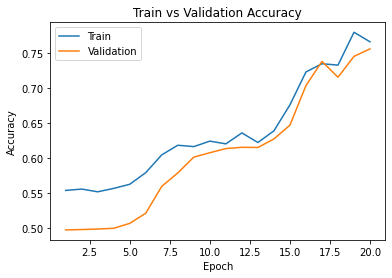

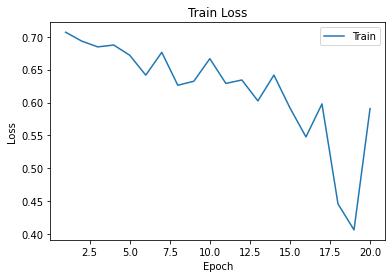

In [273]:
basePath = "/content/drive/MyDrive/Aps360 Project/Datasets/SentimentAnalysis"
epochs=20
modelPath = get_model_name(model.name, hidden_size=50, batch_size=64, learning_rate=2e-4, epoch=epochs-1)
plot_training_curve("{}/{}".format(basePath,modelPath))